# Центральная предельная теорема своими руками

## Инструкции

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

## Реализация

### Гистограмма выборки

Импортируем необходимые библиотеки

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

Сгенерируем выборку объёма 1000 из экспоненциального распределения

In [2]:
rv = sts.expon() 
sample = rv.rvs(1000)

Рассчитаем теоритеческую плотность вероятности для распределения

In [3]:
x = np.linspace(0,15,1000)
pdf = rv.pdf(x)

Построим гистограмму выборки и наложим на нее теоретическую оценку плотности вероятности экспоненциального распределения

C:\Users\DarkUnicorn\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'$f(x)$')

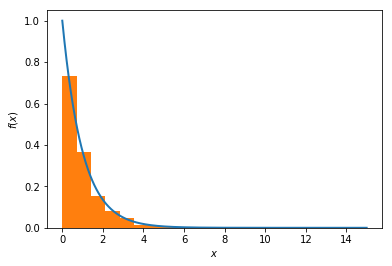

In [4]:
plt.plot(x, pdf, linewidth = 2)
plt.hist(sample, normed = True)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

Вывод: как видно на графике выше, гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

### Распределение выборочных средних

Зададим функцию, которая для объема выборки n генерирует график гистограммы выборочных средних случайной величины и теоретической оценки плотности вероятности для распределения выборочных средних

In [5]:
def gen_pdf(n):
    # сгенерируем выборочные средние по выборкам объема n
    values = []
    for _ in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        values.append(sample_mean)
    
    # расчитаем теоритеческую плотность вероятности для нормального распределения
    mu = 1 #
    sigma = (1./n) ** 0.5
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    # построим гистограмму выборочных средних и наложим на нее теоретическую оценку плотности вероятности нормального распределения
    plt.plot(x, pdf, linewidth = 2)
    plt.hist(values, normed = True)
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

Построим гистограммы распределений выборочных средних и приближающих их нормальных распределений при различных объемах выборок n

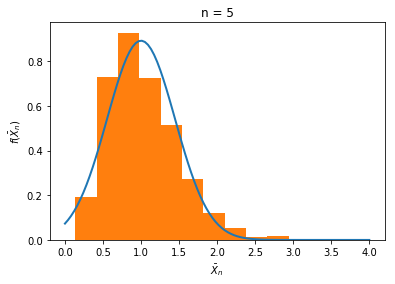

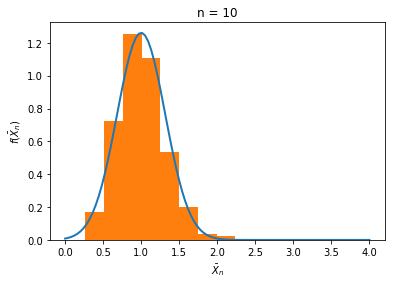

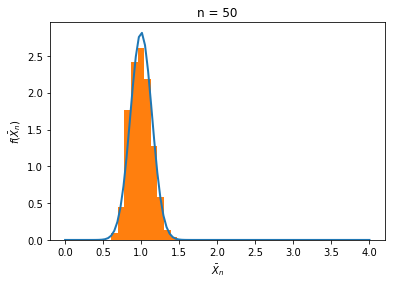

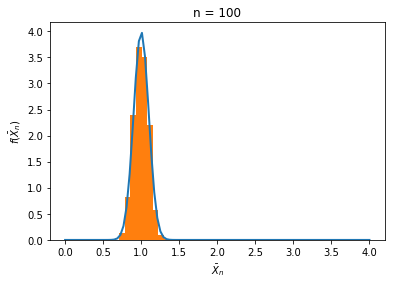

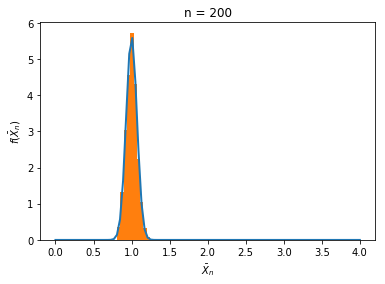

In [6]:
for n in [5, 10, 50, 100, 200]:
    gen_pdf(n)

Вывод: как видно из графиков, чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=5 распределение несимметрично и совсем не похоже на нормальное, но уже при n=50 распределение выборочных средних достаточно хорошо соответсвует нормальному. Также стоит отметить, что с ростом n уменьшается дисперсия распределения выборочных средних.